<a href="https://colab.research.google.com/github/peeyush91099/Major-Project/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/complete.csv')
df

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [2]:
df.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [3]:
df.dropna()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [5]:
df.rename(columns = {'New cases' : 'y','Date':'ds'},inplace = True)
df

,ds,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,y,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [15]:
df['Name of State / UT'].value_counts()

Kerala                                      186
Delhi                                       154
Rajasthan                                   152
Haryana                                     152
Uttar Pradesh                               152
Tamil Nadu                                  149
Punjab                                      147
Maharashtra                                 147
Karnataka                                   147
Andhra Pradesh                              144
Uttarakhand                                 141
Odisha                                      140
Puducherry                                  138
Chhattisgarh                                137
Gujarat                                     136
Ladakh                                      135
Jammu and Kashmir                           135
Madhya Pradesh                              135
Chandigarh                                  135
Himachal Pradesh                            135
Bihar                                   

In [17]:
df.loc[

SyntaxError: ignored

In [9]:
df_new = df[['ds','y']]
df_new

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-03,0
...,...,...
4687,2020-08-06,2092
4688,2020-08-06,97
4689,2020-08-06,4078
4690,2020-08-06,246


In [10]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4692 non-null   datetime64[ns]
 1   y       4692 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 73.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



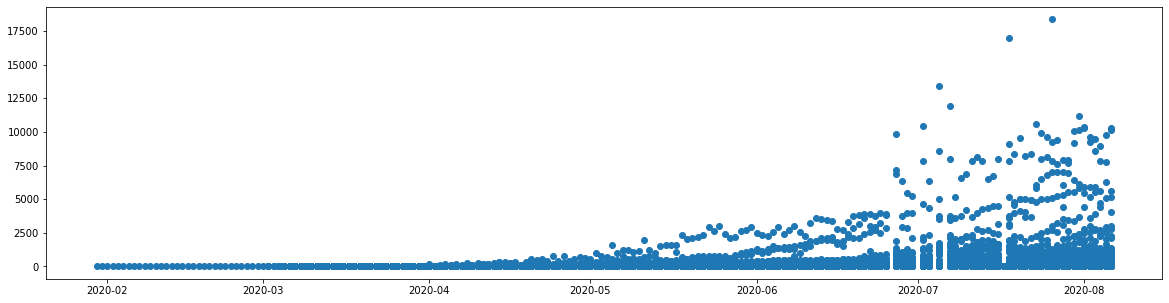

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [7]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'D')
forecast = op.predict(forecast)

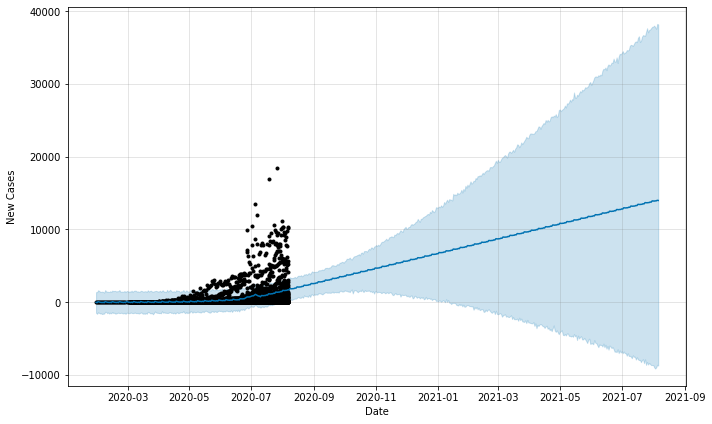

In [12]:
op.plot(forecast,xlabel = 'Date',ylabel='New Cases');